In [33]:
%pylab inline
import numpy as np
import pandas as pd
import os
import Hamiltonian
import MoireLattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/home/juan/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'disp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [34]:
pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathpc
path=pathy+'/Mods/data20_mode_L_symmetry_a_alpha_0.0_beta_1.0_umklp_0_kappa_0.8174358974358973_theta_0.01832595714594046.h5'
df = pd.read_hdf(path)

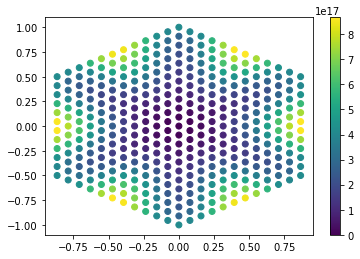

In [35]:
df_prime=df.loc[df['nu']==0]
scatter(df_prime['kx'],df_prime['ky'], c=df_prime['bub'])
colorbar()

Text(0, 0.5, '$\\alpha/ c_L$')

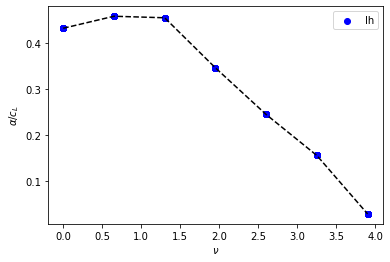

In [36]:

fillings=df['nu']
cep=df['delt_cph']/21400
plt.scatter(fillings, cep, c='b', label='lh')
plt.plot(fillings, cep, c='k', ls='--')
plt.legend()
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\alpha/ c_L$")
# plt.savefig("velocities_V_filling_"+self.name+"_"+str(Nsamp)+"_theta_"+str(theta)+".png")


## For the twist angle 0.75

In [37]:
kappa=0.75
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_T_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))


starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.25939083099365234  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999918
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2452259063720703  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000126
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24111461639404297  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999931
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.23962783813476562  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999971
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2410590648651123  s
number of bands in density of states calculation, 2
sum of the hist, normed? 

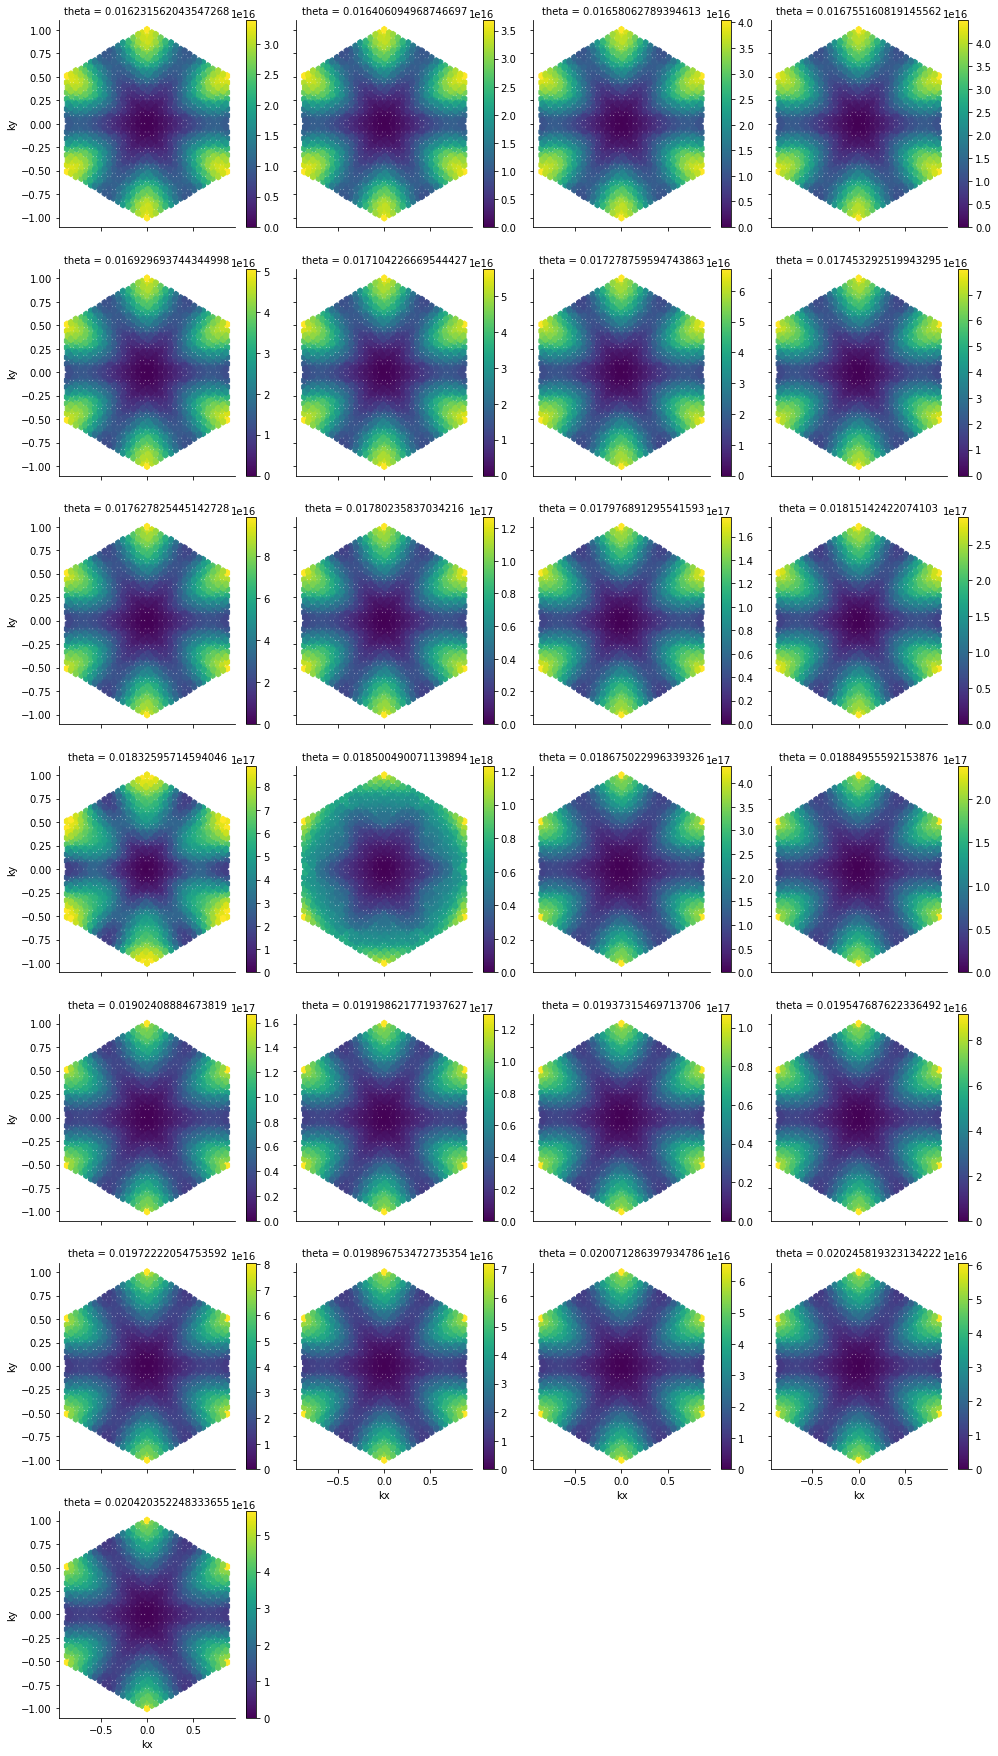

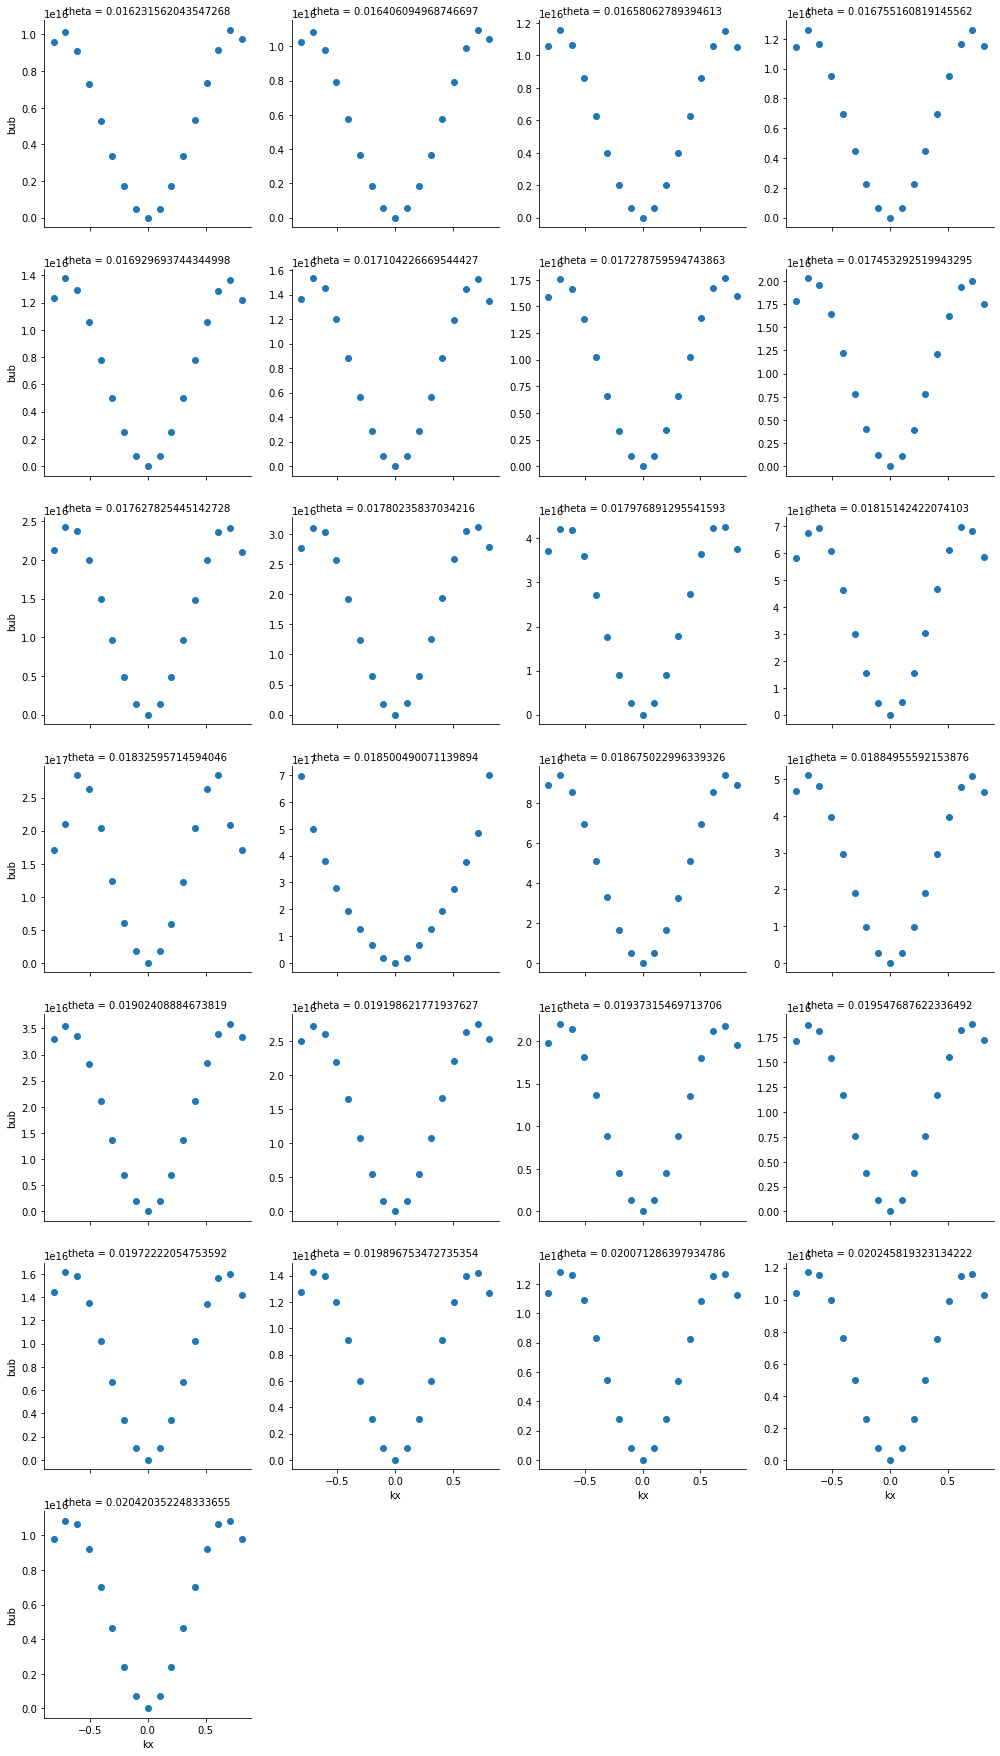

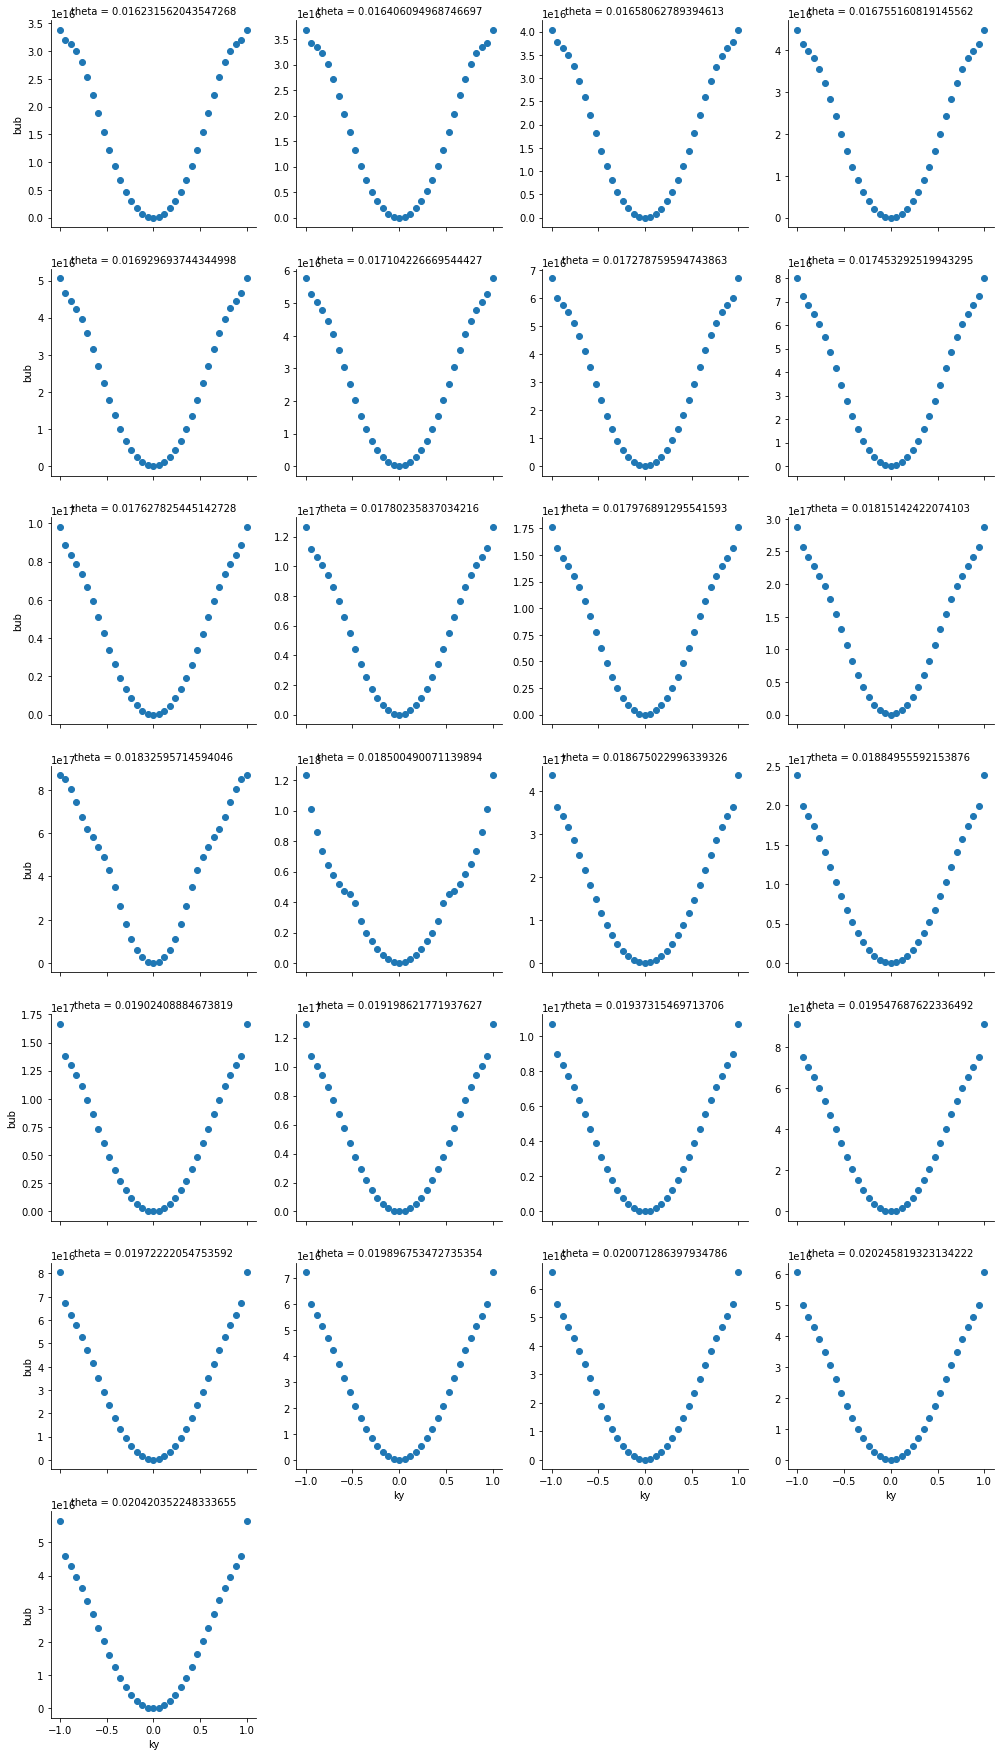

In [38]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', cbar=False, square = True)
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', cbar=False, square = True)
# get figure background color



In [39]:
kappa=0.75
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))



starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2504904270172119  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000133
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2483670711517334  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000151
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24134588241577148  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999787
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24144959449768066  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999967
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2409684658050537  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8

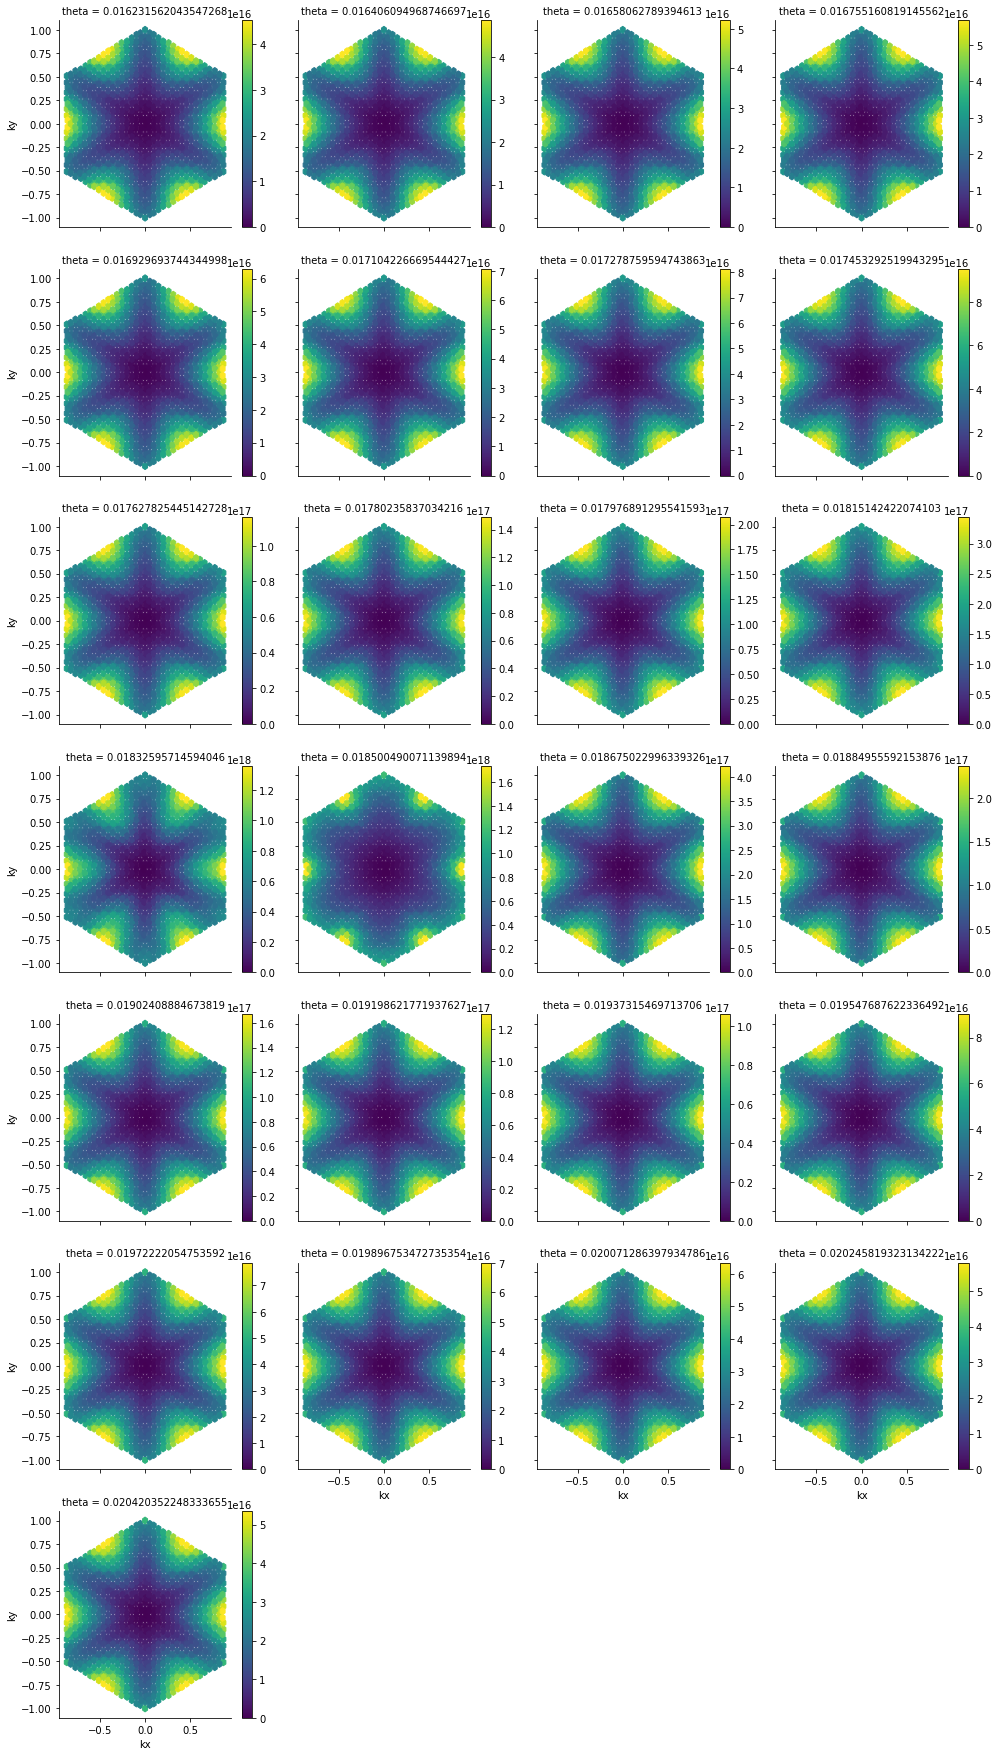

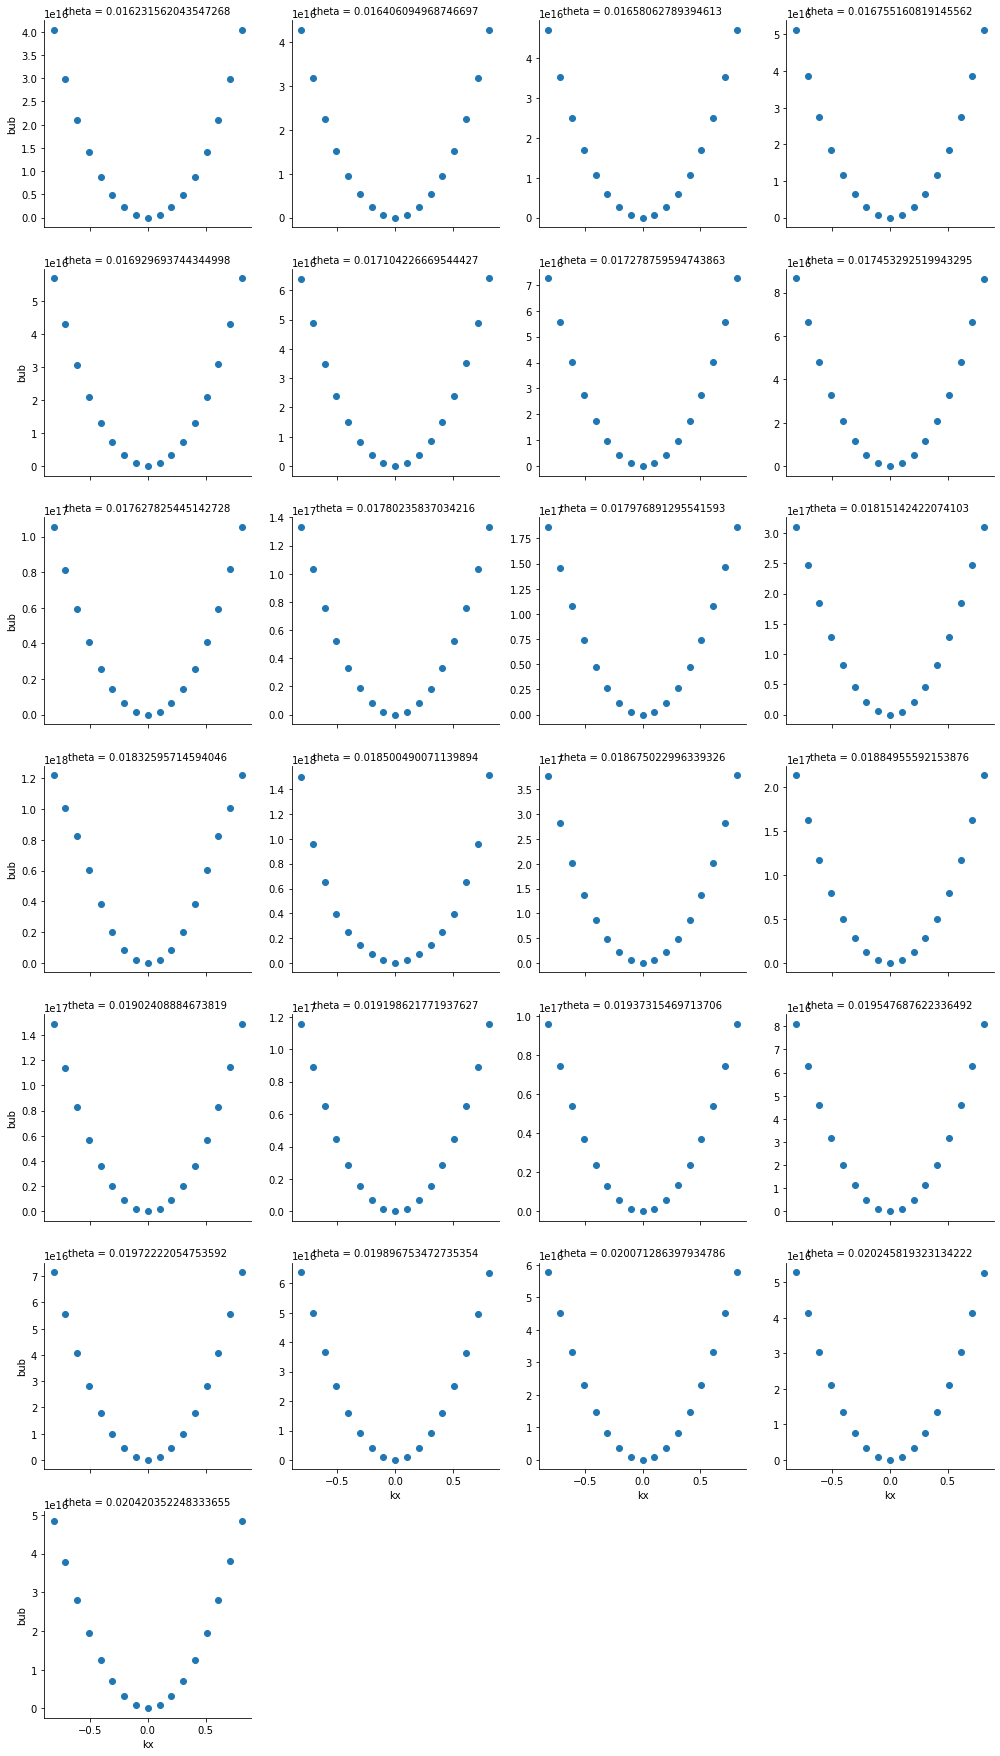

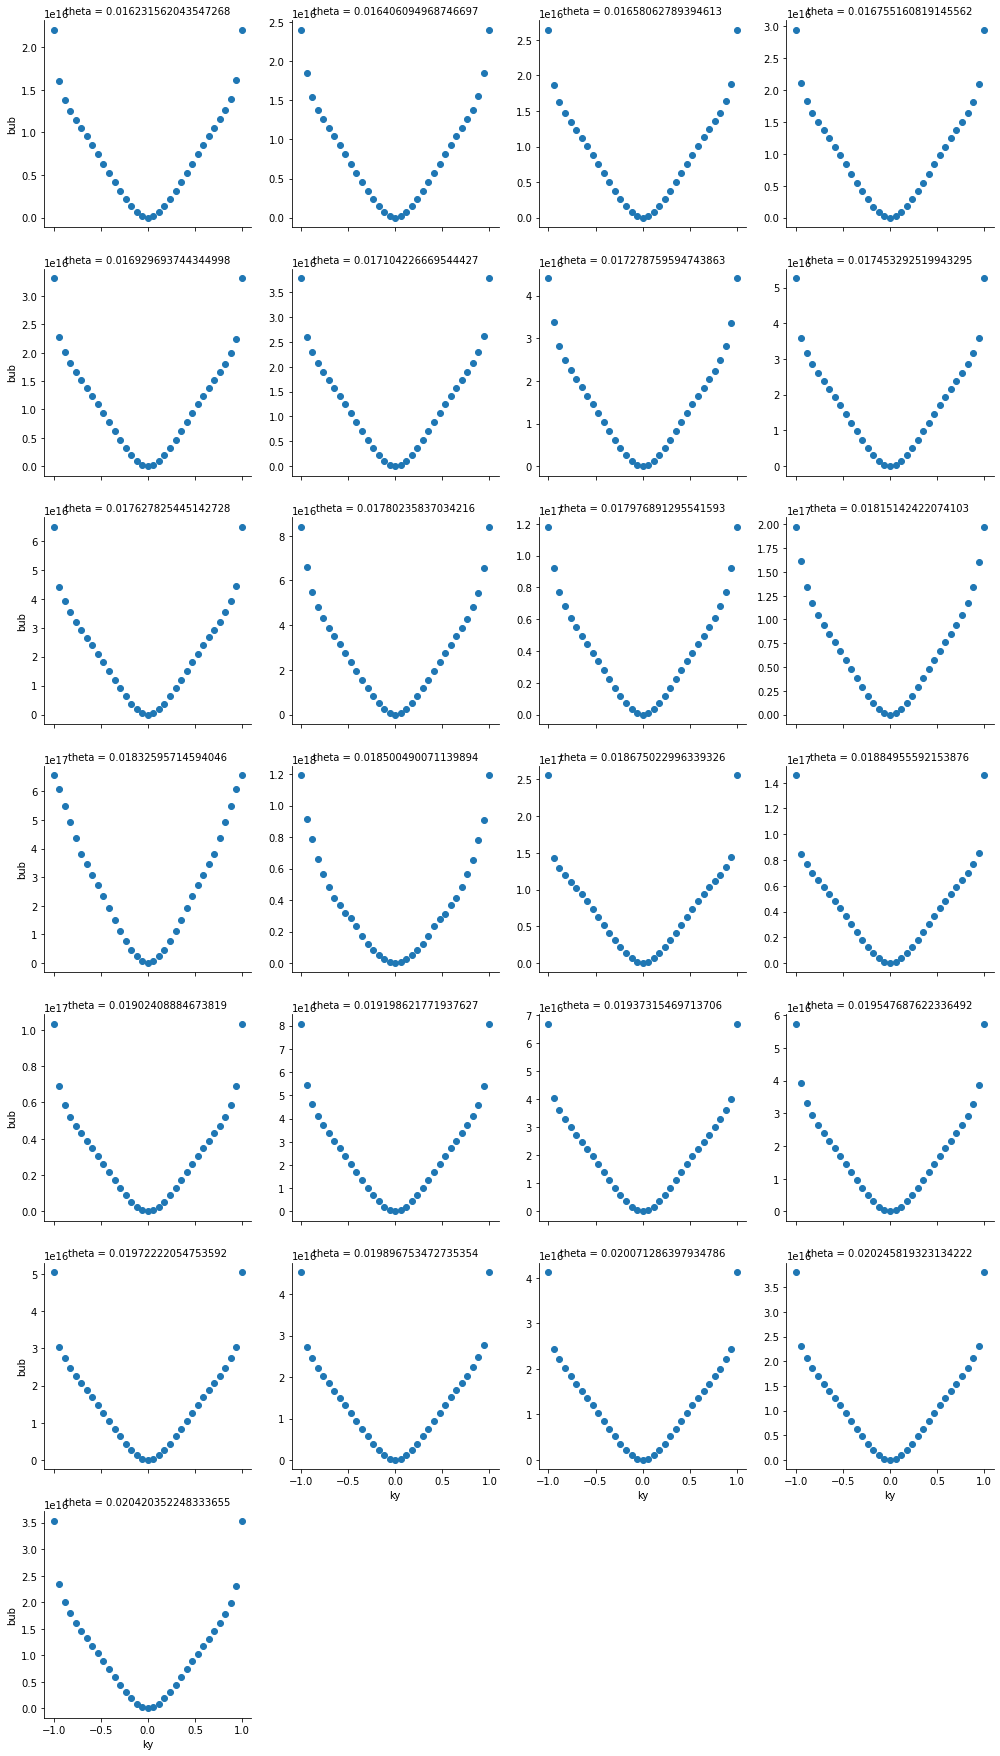

In [40]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', cbar=False, square = True)
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', cbar=False, square = True)
# get figure background color


## For the twist angle 0.3

In [41]:
kappa=0.3
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_T_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))




starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24230051040649414  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000032
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24619126319885254  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000123
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.23974895477294922  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000034
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24014520645141602  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000107
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24039530754089355  s
number of bands in density of states calculation, 2
sum of the hist, normed

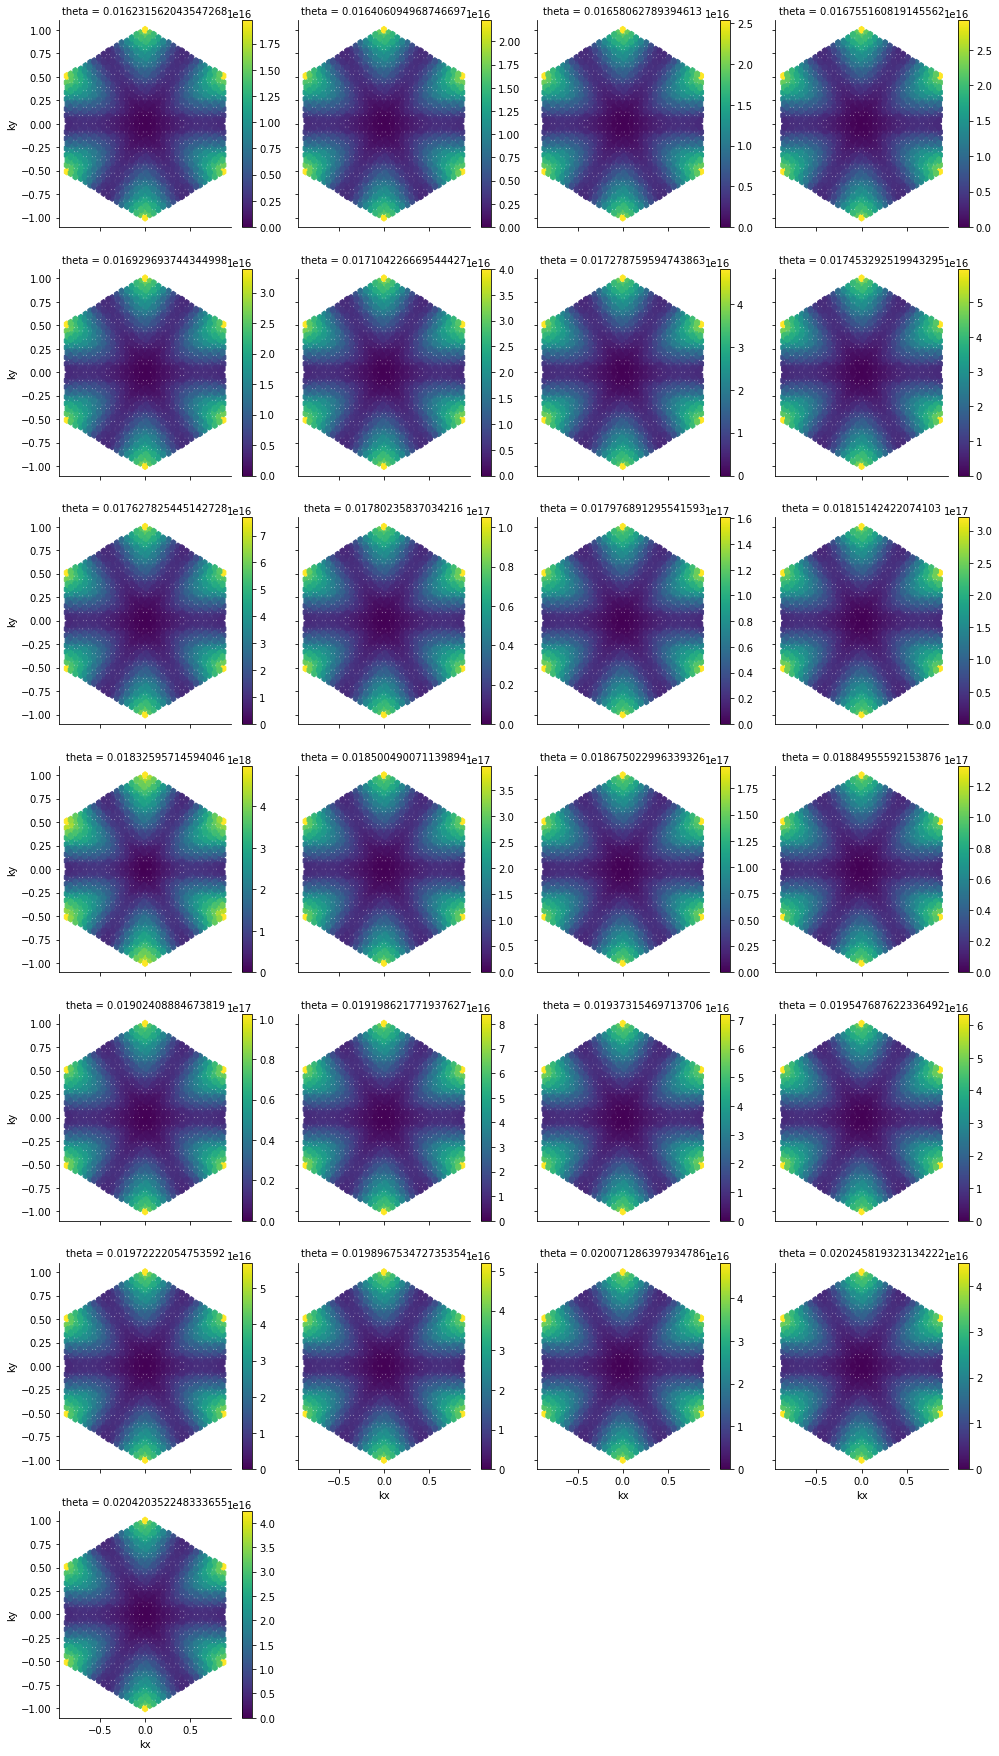

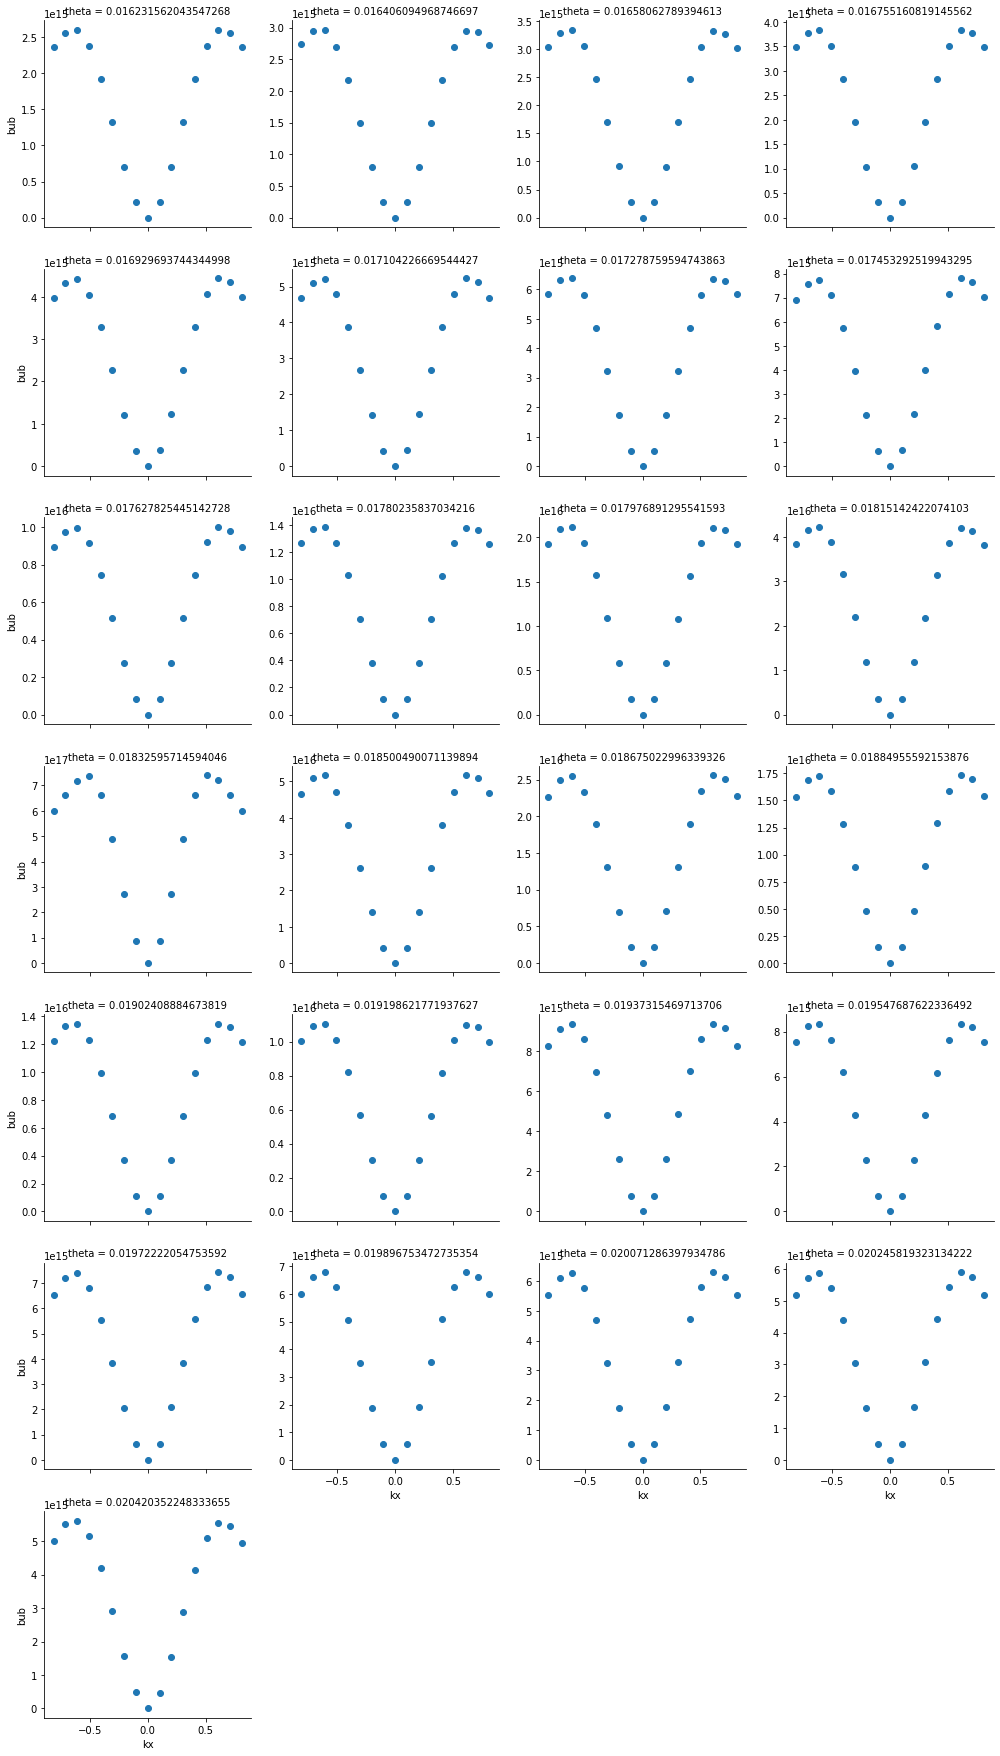

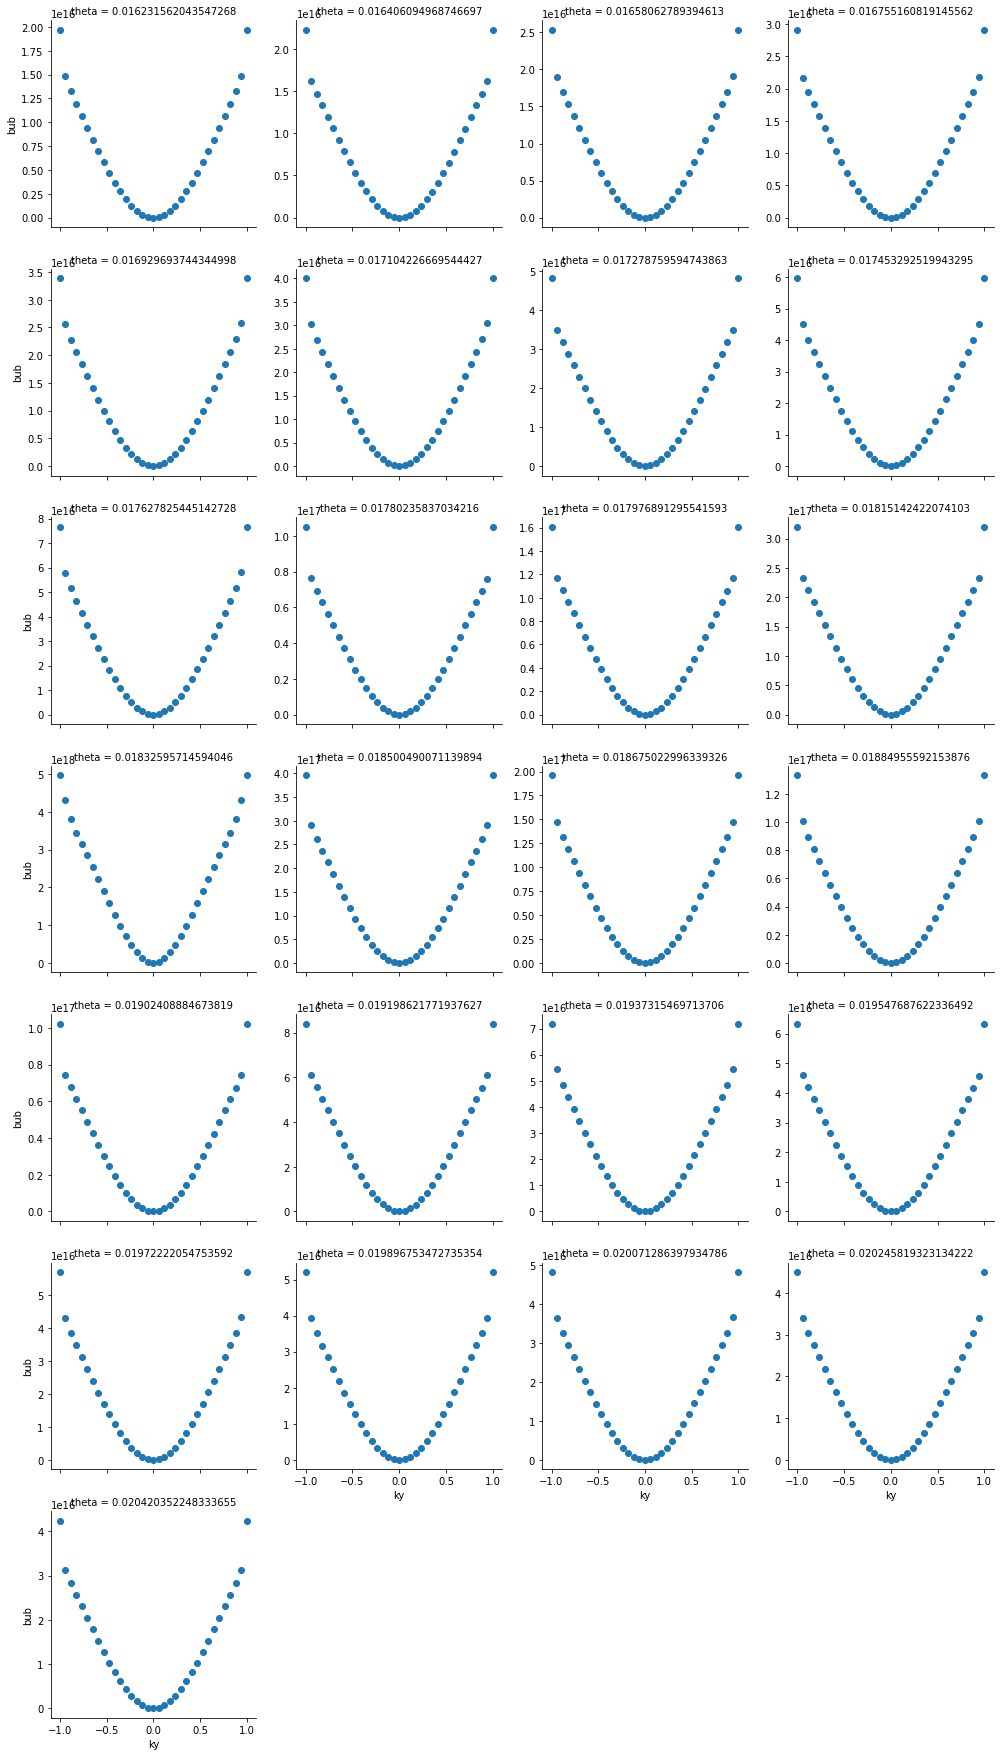

In [42]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', cbar=False, square = True)
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', cbar=False, square = True)
# get figure background color


In [43]:
kappa=0.3
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))


starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2411961555480957  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000075
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24436473846435547  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999888
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.24290895462036133  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999974
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.23976588249206543  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.9999999999998765
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2437267303466797  s
number of bands in density of states calculation, 2
sum of the hist, normed?

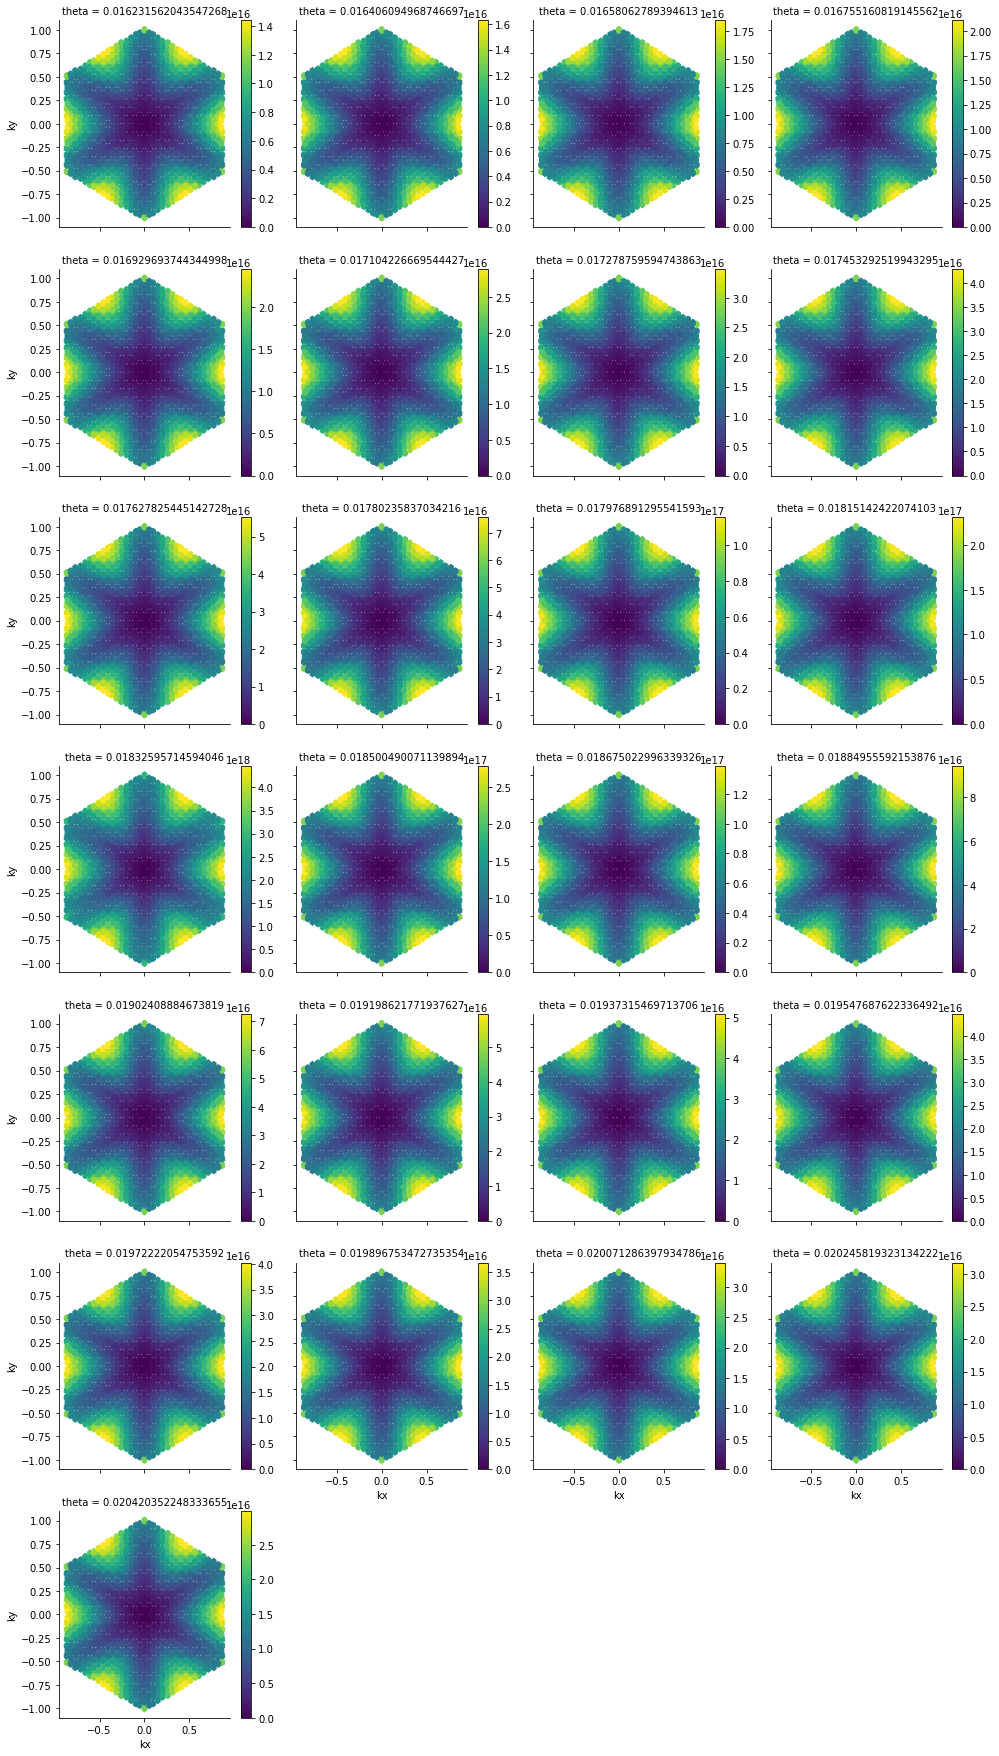

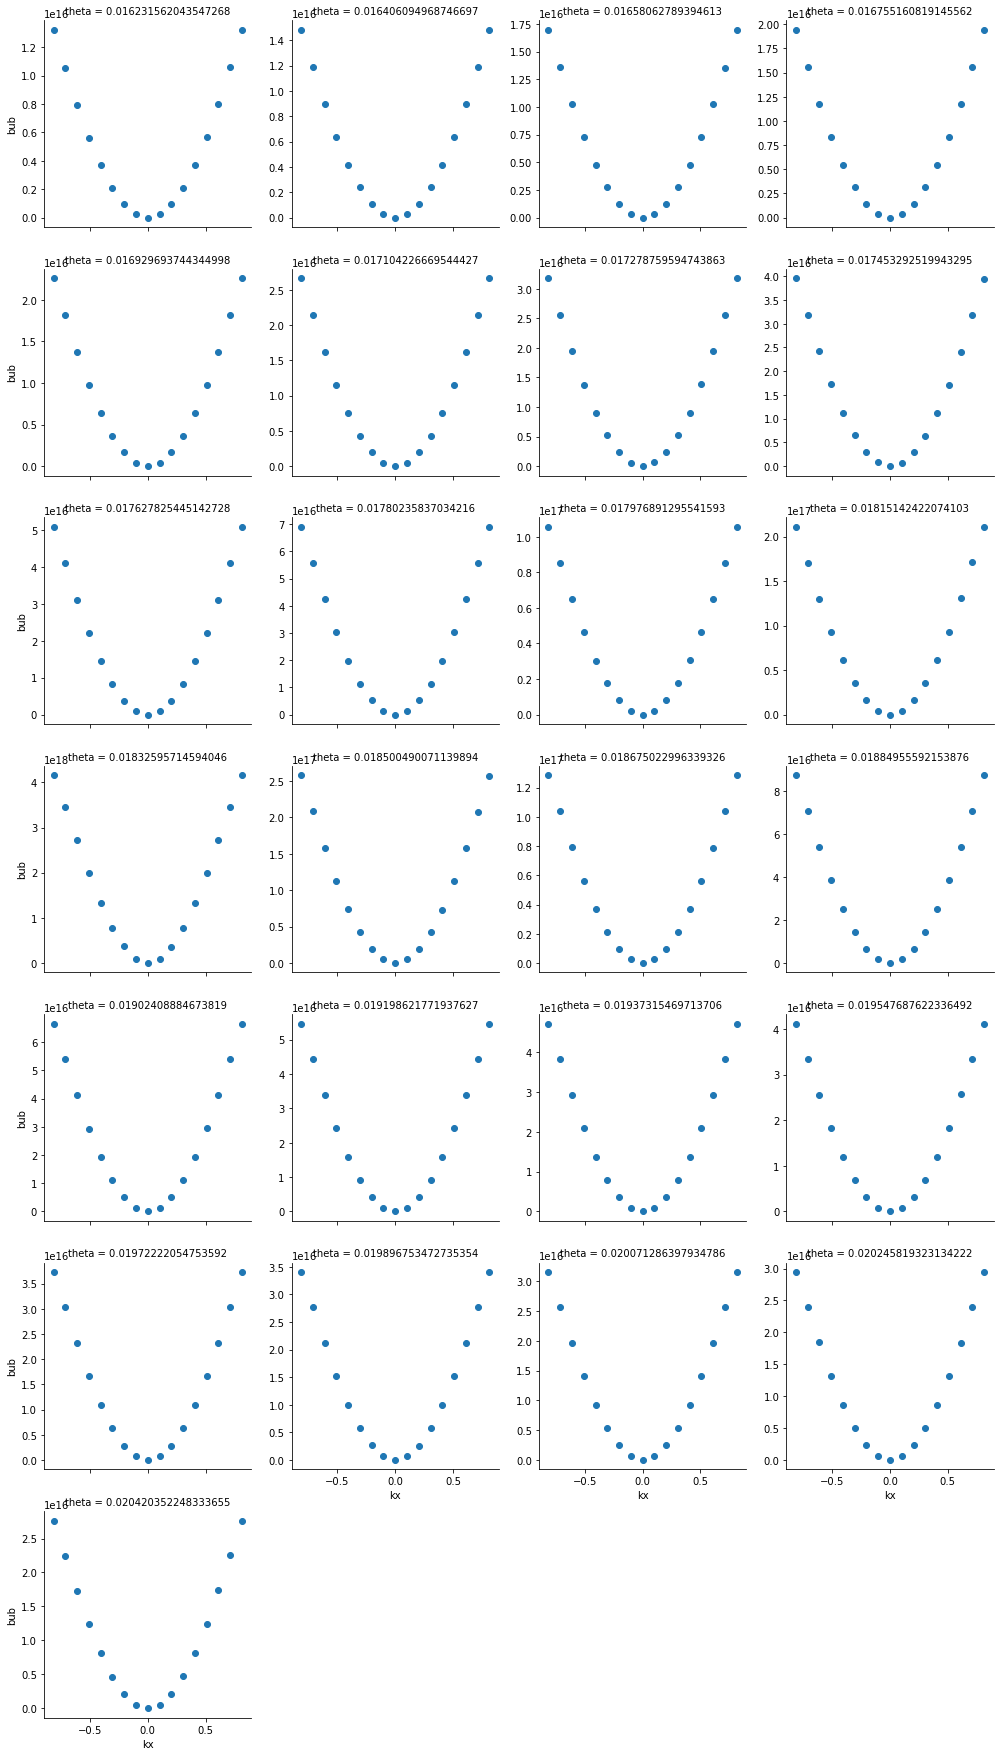

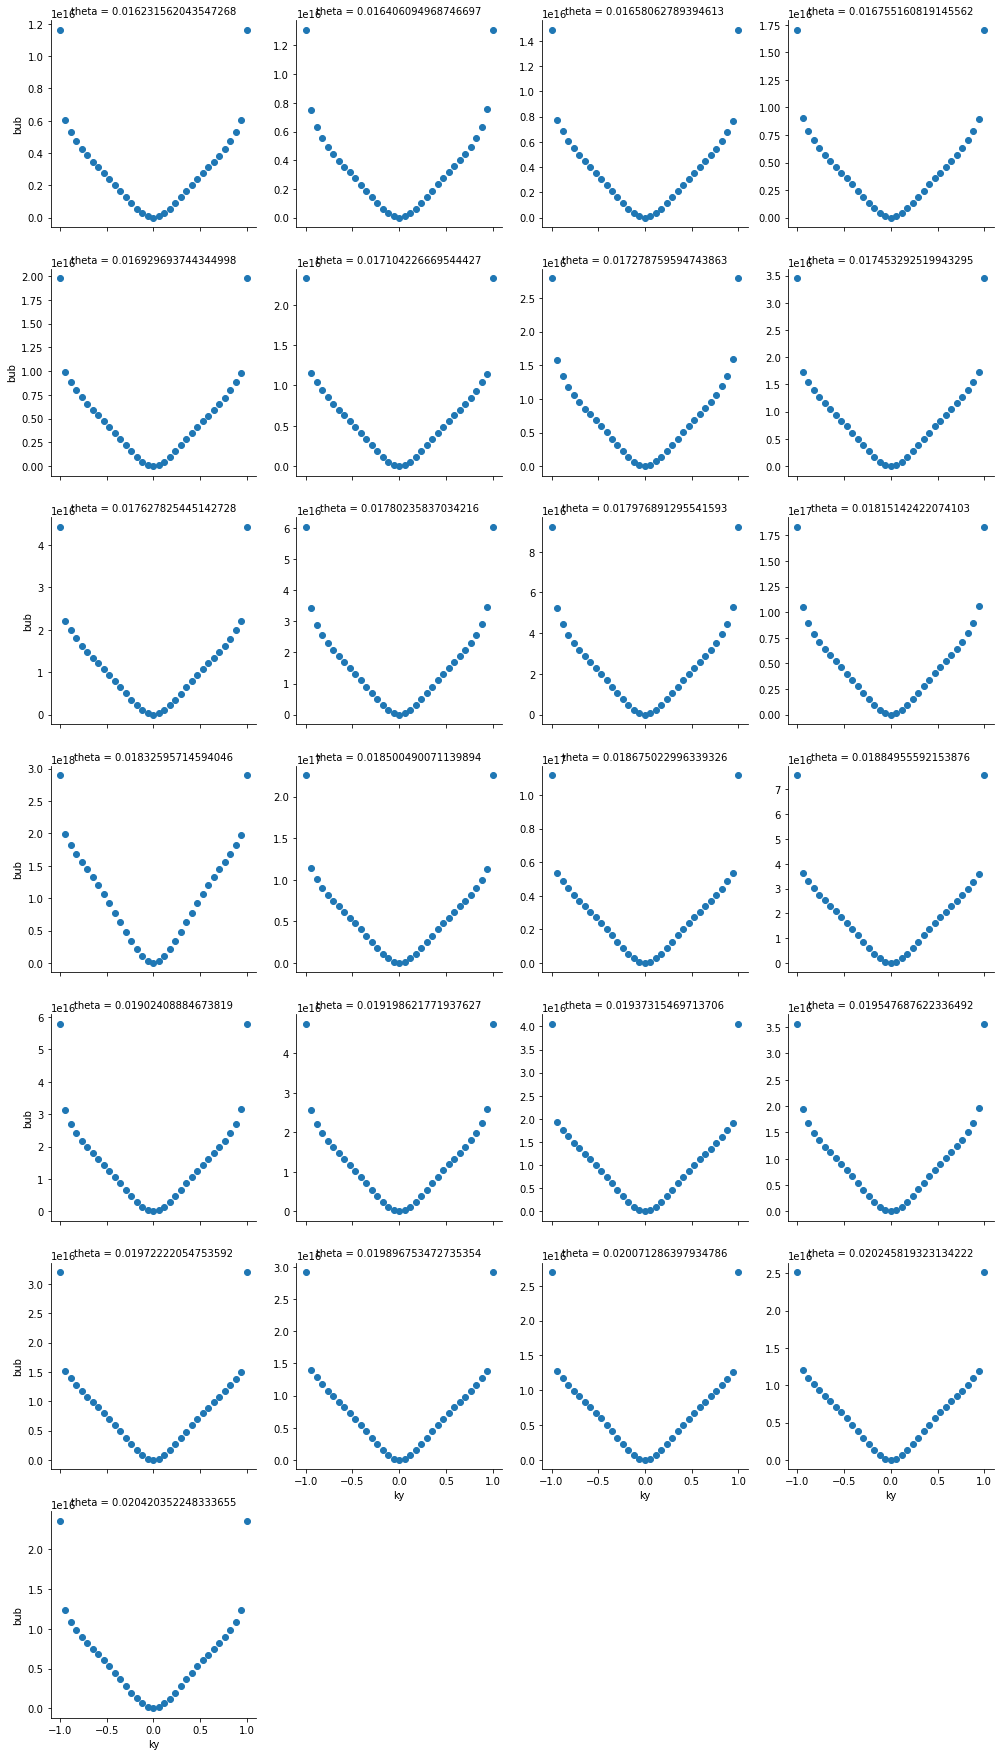

In [45]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', cbar=False, square = True)
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', cbar=False, square = True)
# get figure background color



# For kappa

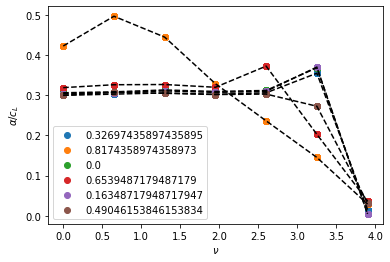

In [10]:
path='/home/jfm343/Documents/Moire_phonon/BM_bandstructure/data/kappasweep_theta_1.05_beta_4ev_N30_2022-01-20-09-58-20'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        

for i, pat in enumerate(subpaths):
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    df = pd.read_hdf(fullpath)
    
    fillings=df['nu']
    cep=df['delt_cph']/21400
    cep2=np.sqrt(1-cep**2)
    plt.scatter(fillings, cep, label=str(df['kappa'][0]))
    plt.plot(fillings, cep, c='k', ls='--')
    plt.legend()
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha/ c_L$")
    # plt.savefig("velocities_V_filling_"+self.name+"_"+str(Nsamp)+"_theta_"+str(theta)+".png")


In [19]:
import Hamiltonian
import MoireLattice
from scipy import linalg as la

#Lattice parameters 
#lattices with different normalizations
modulation_thet=1
Nsamp=10
theta=modulation_thet*1.05*np.pi/180  # magic angle 
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
[KX,KY]=lq.Generate_lattice()
Npoi=np.size(KX); print(Npoi, "numer of sampling lattice points")
[q1,q2,q3]=l.q
q=la.norm(q1)
umkl=0
print(f"taking {umkl} umklapps")
VV=lq.boundary()

print(q, 2*np.sin(theta/2)*np.pi*(4/3))

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.005800485610961914  s
91 numer of sampling lattice points
taking 0 umklapps
0.07676251561000431 0.0767625156100043


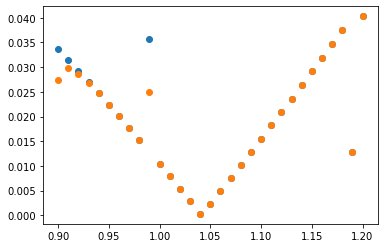

In [21]:
theta=np.linspace(0.9,1.2,31)
bw03=loadtxt(pathy+'/data/bws_test/bw03.dat')
bw075=loadtxt(pathy+'/data/bws_test/bw075.dat')
scatter(theta, bw03)
scatter(theta, bw075)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.0200248362136612

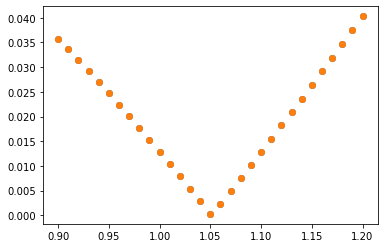

In [4]:
f = open(pathy+'/data/bws_test/bw03.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws)
f = open(pathy+'/data/bws_test/bw075.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

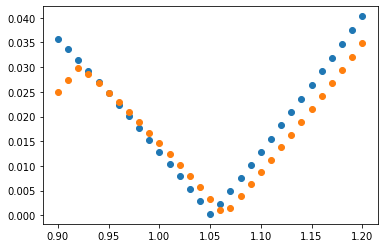

In [4]:
f = open(pathy+'/data/bws_test/bw03.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws)
f = open(pathy+'/data/bws_test/bw075.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

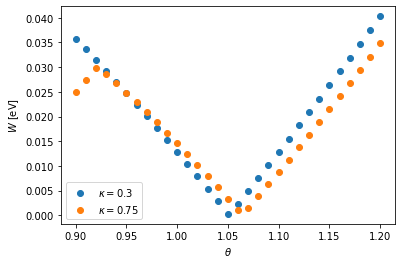

In [5]:
f = open(pathy+'/data/bws_test/bw03_2.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws,label=r'$\kappa=0.3$')
f = open(pathy+'/data/bws_test/bw075_2.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

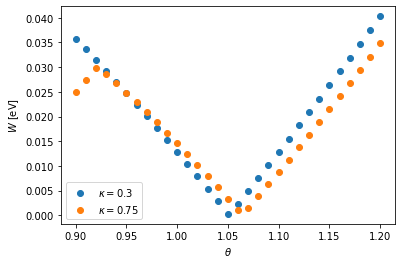

In [6]:
f = open(pathy+'/data/bws_test/bw03_kp.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws,label=r'$\kappa=0.3$')
f = open(pathy+'/data/bws_test/bw075_kp.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

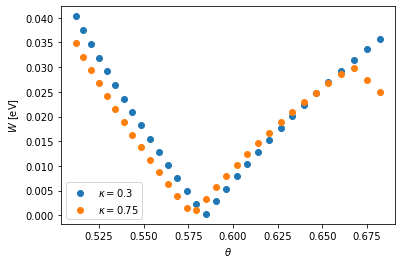

In [14]:
#JY params 

hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
up = 0.105; # eV
Kd=4*np.pi/3

f = open(pathy+'/data/bws_test/bw03_kp.dat', "r")
kappa=0.3
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))

tht=np.array(thetaas)*np.pi/180
q=2*np.sin(tht/2)*Kd
hvkd=hbvf*q
alpha=up/hvkd
alph=alpha   
scatter(alph,bws,label=r'$\kappa=0.3$')


f = open(pathy+'/data/bws_test/bw075_2band_kp.dat', "r")
kappa=0.75
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))


tht=np.array(thetaas)*np.pi/180
q=2*np.sin(tht/2)*Kd
hvkd=hbvf*q
alpha=up/hvkd
alph=alpha   

scatter(alph,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()